### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load and clean data

In [5]:
df = pd.read_csv('car_price_dataset.csv')
df.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [7]:
df = df.drop(columns=['Brand','Model', 'Fuel_Type'])
df.head()

,Year,Engine_Size,Transmission,Mileage,Doors,Owner_Count,Price
0,2020,4.2,Manual,289944,3,5,8501
1,2012,2.0,Automatic,5356,2,3,12092
2,2020,4.2,Automatic,231440,4,2,11171
3,2023,2.0,Manual,160971,2,1,11780
4,2003,2.6,Semi-Automatic,286618,3,3,2867


In [9]:
mapping = {'Manual': 0, 'Automatic': 1, 'Semi-Automatic': 2}

# Replace values
df['Transmission'] = df['Transmission'].replace(mapping)

df.head()


/var/folders/mk/8gg5fjrj0k9_xsv4s8c182f00000gn/T/ipykernel_2811/3597345882.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Transmission'] = df['Transmission'].replace(mapping)


,Year,Engine_Size,Transmission,Mileage,Doors,Owner_Count,Price
0,2020,4.2,0,289944,3,5,8501
1,2012,2.0,1,5356,2,3,12092
2,2020,4.2,1,231440,4,2,11171
3,2023,2.0,0,160971,2,1,11780
4,2003,2.6,2,286618,3,3,2867


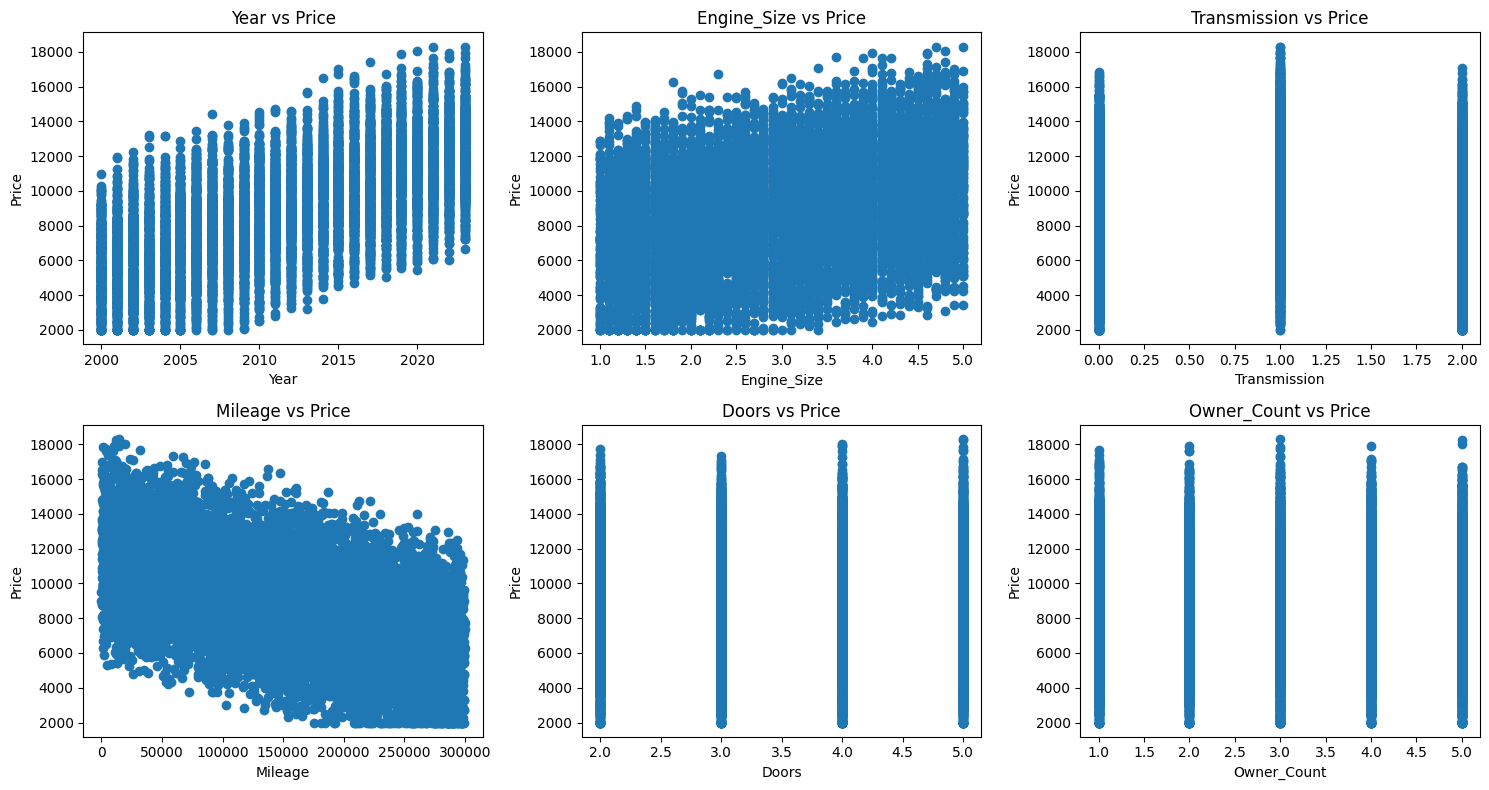

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 columns

x_labels = ['Year', 'Engine_Size', 'Transmission', 
            'Mileage', 'Doors', 'Owner_Count']
titles = ['Year vs Price', 'Engine_Size vs Price', 
          'Transmission vs Price', 
          'Mileage vs Price', 
          'Doors vs Price',
          'Owner_Count vs Price']

axes = axes.flatten()  # Convert 2D array to 1D for easy iteration

for i in range(6):  
    axes[i].scatter(df[x_labels[i]], df['Price'])
    axes[i].set_xlabel(x_labels[i])
    axes[i].set_ylabel('Price')
    axes[i].set_title(titles[i])

# Remove any unused subplots (if any)
for j in range(6, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### Modeling

In [13]:
cdf = df [['Year', 'Engine_Size', 'Mileage', 'Price']]

In [15]:
from sklearn.model_selection import train_test_split
X = cdf [['Year', 'Engine_Size', 'Mileage']].values
y = cdf [['Price']].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=4)

In [67]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
# The coefficients
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[ 9.75670096  7.20902613 10.36988138]]
Intercept:  [62.1602047]


In [69]:
y_hat = reg.predict(X_test)

### Evaluation

In [72]:
from sklearn.metrics import r2_score
print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

Mean absolute error: 15.99
Residual sum of squares (MSE): 508.03
R2-score: 0.87
